This notebook will demonstrate the use of a neural network to classify face images. The classifier will attempt to distinguish between faces turning left and faces turning right. We will vary the number of nodes in the hidden layer to examine the effect on performance.

First we load the appropriate libraries:

In [1]:
library(pixmap)
library(gdata)

gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
gdata: 
gdata: (To avoid display of this message in the future, please ensure
gdata: perl is installed and available on the executable search path.)
gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: 'gdata'

The following object is masked from 'package:stats':

    nobs

The following object is masked from 'package:utils':

    object.size

The following object is masked from 'package:base':

    startsWith



Here are examples of the face data:

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"

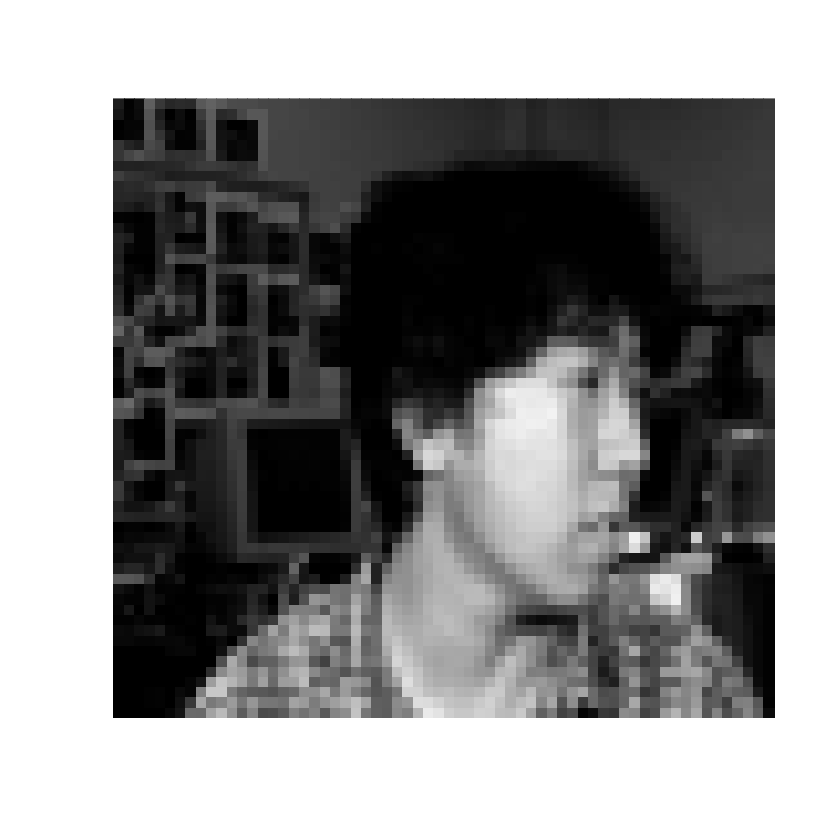

In [5]:
left1<-read.pnm(file="Homework 4 Face Dataset/Left/left1.pgm")
plot(left1)

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"

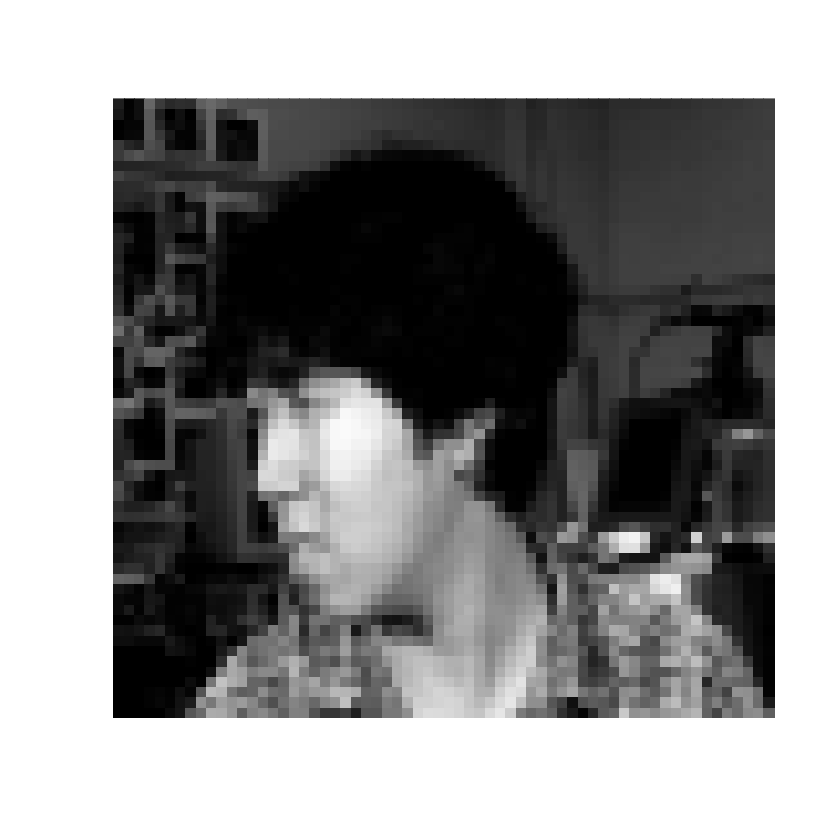

In [6]:
right1<-read.pnm(file="Homework 4 Face Dataset/Right/right1.pgm")
plot(right1)

Next we train the network. We will randomize the data and then use 80% of it to train the neural network and 20% of it to test the data.

We first use the following function to load the data:

In [7]:
loadImages <- function(pathName,fileNames, clasLabel) 
{
files<-list.files(path=pathName,pattern=fileNames,all.files=T,full.name=T,no..=T)
list_of_images=lapply(files,read.pnm)
plot(list_of_images[[1]])
n.images<-length(list_of_images)
image.matrix<-list_of_images[[1]]@grey
image.vector<-unmatrix(image.matrix,byrow=T)
for(ii in 2:n.images)
{
 i.matrix<-list_of_images[[ii]]@grey
 i.vector<-unmatrix(i.matrix,byrow=T)
 image.vector<-rbind(image.vector,i.vector)
}
image.frame<-data.frame(image.vector)
n.rows<-nrow(image.frame)
class1.label<-rep(clasLabel,n.rows)
image.frame<-cbind(image.frame,class1.label)
return (image.frame)
}

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the 

,r1.c1,r1.c2,r1.c3,r1.c4,r1.c5,r1.c6,r1.c7,r1.c8,r1.c9,r1.c10,...,r60.c56,r60.c57,r60.c58,r60.c59,r60.c60,r60.c61,r60.c62,r60.c63,r60.c64,class1.label
image.vector,0.10897436,0.006410256,0.05128205,0.37179487,0.21794872,0.1538462,0.1666667,0.1602564,0.3461538,0.3846154,...,0.53205128,0.65384615,0.333333333,0.51282051,0.30769231,0.391025641,0.52564103,0.37820513,0.044871795,0
i.vector,0.20769231,0.200000000,0.20000000,0.19230769,0.18461538,0.1769231,0.1692308,0.1692308,0.1615385,0.1538462,...,0.86923077,0.50000000,0.007692308,0.03076923,0.03846154,0.146153846,0.22307692,0.22307692,0.215384615,0
i.vector.1,0.18852459,0.180327869,0.17213115,0.16393443,0.16393443,0.1557377,0.1557377,0.1475410,0.1393443,0.1311475,...,0.90163934,0.90163934,0.901639344,0.90163934,0.70491803,0.188524590,0.22131148,0.21311475,0.204918033,0
i.vector.2,0.20634921,0.198412698,0.19841270,0.19047619,0.18253968,0.1746032,0.1746032,0.1666667,0.1587302,0.1587302,...,0.92063492,0.61904762,0.023809524,0.03174603,0.03968254,0.142857143,0.22222222,0.21428571,0.214285714,0
i.vector.3,0.17500000,0.175000000,0.16666667,0.16666667,0.15833333,0.1500000,0.1500000,0.1416667,0.1333333,0.1250000,...,0.91666667,0.91666667,0.916666667,0.91666667,0.80833333,0.441666667,0.21666667,0.21666667,0.208333333,0
i.vector.4,0.20000000,0.192000000,0.19200000,0.18400000,0.17600000,0.1680000,0.1680000,0.1600000,0.1520000,0.1440000,...,0.88800000,0.50400000,0.000000000,0.02400000,0.04000000,0.136000000,0.21600000,0.21600000,0.208000000,0
i.vector.5,0.19834711,0.190082645,0.18181818,0.17355372,0.17355372,0.1652893,0.1570248,0.1487603,0.1487603,0.1404959,...,0.90909091,0.91735537,0.685950413,0.03305785,0.04132231,0.132231405,0.20661157,0.20661157,0.198347107,0
i.vector.6,0.19841270,0.198412698,0.19047619,0.18253968,0.17460317,0.1746032,0.1666667,0.1587302,0.1587302,0.1507937,...,0.88888889,0.51587302,0.007936508,0.03174603,0.03968254,0.142857143,0.22222222,0.22222222,0.222222222,0
i.vector.7,0.24161074,0.228187919,0.22147651,0.21476510,0.21476510,0.2080537,0.2013423,0.2013423,0.1946309,0.1879195,...,0.26174497,0.26845638,0.268456376,0.26845638,0.26174497,0.261744966,0.26174497,0.25503356,0.241610738,0
i.vector.8,0.21935484,0.212903226,0.21290323,0.20645161,0.20000000,0.1935484,0.1870968,0.1806452,0.1806452,0.1741935,...,0.28387097,0.27741935,0.264516129,0.25161290,0.23870968,0.225806452,0.21290323,0.20645161,0.200000000,0


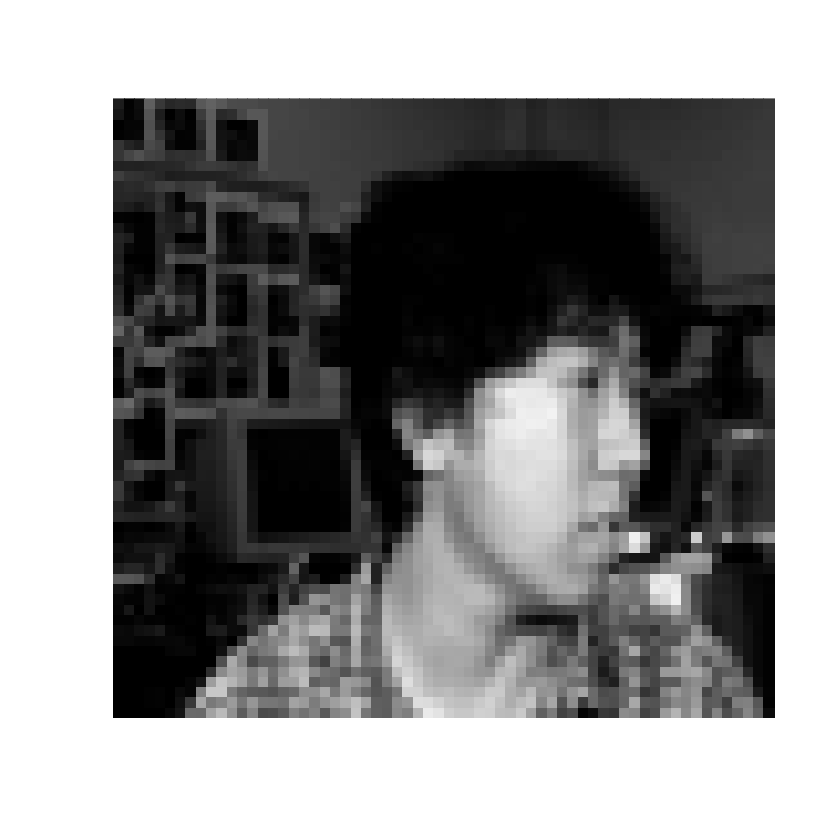

In [9]:
left.frame <- loadImages("Homework 4 Face Dataset/Left", "left*.*", 0)
left.frame

Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the result will be NULL"Warning message in rep(cellres, length = 2):
"'x' is NULL so the 

,r1.c1,r1.c2,r1.c3,r1.c4,r1.c5,r1.c6,r1.c7,r1.c8,r1.c9,r1.c10,...,r60.c56,r60.c57,r60.c58,r60.c59,r60.c60,r60.c61,r60.c62,r60.c63,r60.c64,class1.label
image.vector,0.11612903,0.006451613,0.05806452,0.40000000,0.23225806,0.1612903,0.1806452,0.1741935,0.3677419,0.4129032,...,0.6645161,0.7096774,0.380645161,0.26451613,0.49032258,0.419354839,0.53548387,0.55483871,0.374193548,1
i.vector,0.22047244,0.212598425,0.20472441,0.18897638,0.18110236,0.1811024,0.1732283,0.1732283,0.1653543,0.1653543,...,0.9212598,0.8031496,0.409448819,0.03149606,0.03937008,0.133858268,0.21259843,0.22047244,0.212598425,1
i.vector.1,0.19166667,0.183333333,0.17500000,0.17500000,0.16666667,0.1583333,0.1583333,0.1500000,0.1416667,0.1416667,...,0.9166667,0.9166667,0.916666667,0.91666667,0.81666667,0.416666667,0.21666667,0.21666667,0.208333333,1
i.vector.2,0.20161290,0.201612903,0.19354839,0.19354839,0.18548387,0.1774194,0.1693548,0.1612903,0.1612903,0.1532258,...,0.9274194,0.7500000,0.096774194,0.03225806,0.04032258,0.145161290,0.21774194,0.21774194,0.217741935,1
i.vector.3,0.19327731,0.184873950,0.18487395,0.17647059,0.16806723,0.1596639,0.1512605,0.1512605,0.1428571,0.1428571,...,0.9243697,0.9243697,0.915966387,0.91596639,0.82352941,0.521008403,0.21848739,0.21848739,0.210084034,1
i.vector.4,0.19200000,0.192000000,0.19200000,0.18400000,0.17600000,0.1680000,0.1600000,0.1600000,0.1520000,0.1440000,...,0.8960000,0.6800000,0.040000000,0.02400000,0.04000000,0.136000000,0.20000000,0.20000000,0.200000000,1
i.vector.5,0.19166667,0.191666667,0.18333333,0.18333333,0.17500000,0.1750000,0.1666667,0.1583333,0.1500000,0.1500000,...,0.9166667,0.9166667,0.608333333,0.03333333,0.04166667,0.133333333,0.20833333,0.20833333,0.200000000,1
i.vector.6,0.20161290,0.193548387,0.19354839,0.18548387,0.17741935,0.1693548,0.1612903,0.1612903,0.1532258,0.1532258,...,0.9274194,0.7500000,0.112903226,0.03225806,0.04032258,0.145161290,0.22580645,0.21774194,0.217741935,1
i.vector.7,0.23026316,0.230263158,0.22368421,0.21710526,0.21052632,0.2039474,0.2039474,0.1973684,0.1842105,0.1776316,...,0.2434211,0.2105263,0.184210526,0.35526316,0.31578947,0.322368421,0.32236842,0.32236842,0.315789474,1
i.vector.8,0.23566879,0.222929936,0.22292994,0.21656051,0.21019108,0.2038217,0.2038217,0.1974522,0.1910828,0.1847134,...,0.2993631,0.2675159,0.369426752,0.23566879,0.31847134,0.318471338,0.31210191,0.31210191,0.305732484,1


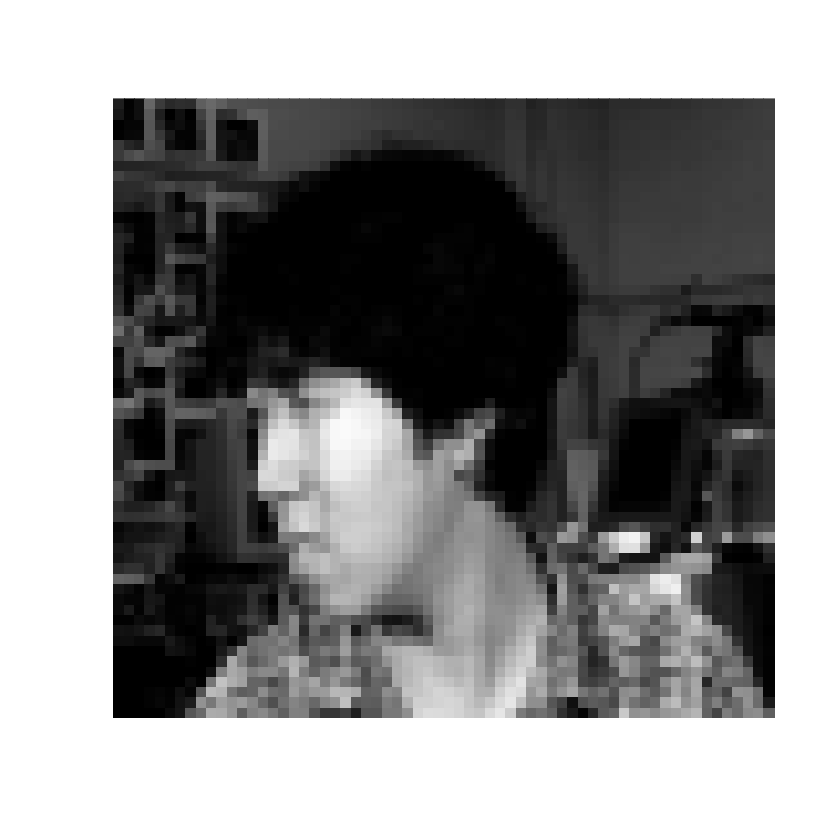

In [10]:
right.frame<-loadImages("Homework 4 Face Dataset/Right", "right*.*", 1)
right.frame

In [11]:
total.frame<-rbind(left.frame,right.frame)
total.frame

,r1.c1,r1.c2,r1.c3,r1.c4,r1.c5,r1.c6,r1.c7,r1.c8,r1.c9,r1.c10,...,r60.c56,r60.c57,r60.c58,r60.c59,r60.c60,r60.c61,r60.c62,r60.c63,r60.c64,class1.label
image.vector,0.10897436,0.006410256,0.05128205,0.37179487,0.21794872,0.1538462,0.1666667,0.1602564,0.3461538,0.3846154,...,0.5320513,0.6538462,0.333333333,0.51282051,0.30769231,0.3910256,0.5256410,0.37820513,0.044871795,0
i.vector,0.20769231,0.200000000,0.20000000,0.19230769,0.18461538,0.1769231,0.1692308,0.1692308,0.1615385,0.1538462,...,0.8692308,0.5000000,0.007692308,0.03076923,0.03846154,0.1461538,0.2230769,0.22307692,0.215384615,0
i.vector.1,0.18852459,0.180327869,0.17213115,0.16393443,0.16393443,0.1557377,0.1557377,0.1475410,0.1393443,0.1311475,...,0.9016393,0.9016393,0.901639344,0.90163934,0.70491803,0.1885246,0.2213115,0.21311475,0.204918033,0
i.vector.2,0.20634921,0.198412698,0.19841270,0.19047619,0.18253968,0.1746032,0.1746032,0.1666667,0.1587302,0.1587302,...,0.9206349,0.6190476,0.023809524,0.03174603,0.03968254,0.1428571,0.2222222,0.21428571,0.214285714,0
i.vector.3,0.17500000,0.175000000,0.16666667,0.16666667,0.15833333,0.1500000,0.1500000,0.1416667,0.1333333,0.1250000,...,0.9166667,0.9166667,0.916666667,0.91666667,0.80833333,0.4416667,0.2166667,0.21666667,0.208333333,0
i.vector.4,0.20000000,0.192000000,0.19200000,0.18400000,0.17600000,0.1680000,0.1680000,0.1600000,0.1520000,0.1440000,...,0.8880000,0.5040000,0.000000000,0.02400000,0.04000000,0.1360000,0.2160000,0.21600000,0.208000000,0
i.vector.5,0.19834711,0.190082645,0.18181818,0.17355372,0.17355372,0.1652893,0.1570248,0.1487603,0.1487603,0.1404959,...,0.9090909,0.9173554,0.685950413,0.03305785,0.04132231,0.1322314,0.2066116,0.20661157,0.198347107,0
i.vector.6,0.19841270,0.198412698,0.19047619,0.18253968,0.17460317,0.1746032,0.1666667,0.1587302,0.1587302,0.1507937,...,0.8888889,0.5158730,0.007936508,0.03174603,0.03968254,0.1428571,0.2222222,0.22222222,0.222222222,0
i.vector.7,0.24161074,0.228187919,0.22147651,0.21476510,0.21476510,0.2080537,0.2013423,0.2013423,0.1946309,0.1879195,...,0.2617450,0.2684564,0.268456376,0.26845638,0.26174497,0.2617450,0.2617450,0.25503356,0.241610738,0
i.vector.8,0.21935484,0.212903226,0.21290323,0.20645161,0.20000000,0.1935484,0.1870968,0.1806452,0.1806452,0.1741935,...,0.2838710,0.2774194,0.264516129,0.25161290,0.23870968,0.2258065,0.2129032,0.20645161,0.200000000,0


Next we create the training and test sets:

In [12]:
train.index<-sample(nrow(total.frame),nrow(total.frame)*0.8)
training.set<-total.frame[train.index,]
training.set

,r1.c1,r1.c2,r1.c3,r1.c4,r1.c5,r1.c6,r1.c7,r1.c8,r1.c9,r1.c10,...,r60.c56,r60.c57,r60.c58,r60.c59,r60.c60,r60.c61,r60.c62,r60.c63,r60.c64,class1.label
i.vector.5,0.19834711,0.190082645,0.18181818,0.17355372,0.17355372,0.1652893,0.1570248,0.1487603,0.1487603,0.1404959,...,0.9090909,0.9173554,0.685950413,0.03305785,0.04132231,0.1322314,0.20661157,0.20661157,0.19834711,0
i.vector.12,0.22368421,0.217105263,0.21710526,0.21052632,0.21052632,0.2039474,0.1973684,0.1907895,0.1842105,0.1842105,...,0.2631579,0.2565789,0.256578947,0.25657895,0.24342105,0.2368421,0.22368421,0.21052632,0.19736842,0
i.vector.471,0.12179487,0.006410256,0.06410256,0.41666667,0.23717949,0.1666667,0.1858974,0.1794872,0.3782051,0.4166667,...,0.3589744,0.5705128,0.596153846,0.31410256,0.38461538,0.1538462,0.05769231,0.02564103,0.00000000,1
i.vector.18,0.20967742,0.209677419,0.20161290,0.19354839,0.18548387,0.1854839,0.1693548,0.1693548,0.1612903,0.1532258,...,0.9112903,0.9112903,0.895161290,0.89516129,0.89516129,0.2580645,0.21774194,0.20967742,0.20967742,0
i.vector.47,0.11538462,0.006410256,0.05769231,0.40384615,0.23076923,0.1602564,0.1794872,0.1730769,0.3653846,0.4102564,...,0.5512821,0.6217949,0.320512821,0.35897436,0.17948718,0.1153846,0.05769231,0.02564103,0.00000000,0
i.vector.291,0.21804511,0.293233083,0.24060150,0.24060150,0.24060150,0.2330827,0.2330827,0.2255639,0.2180451,0.2180451,...,0.7669173,0.7593985,0.706766917,0.22556391,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,1
i.vector.41,0.02205882,0.257352941,0.19117647,0.19117647,0.19117647,0.1911765,0.1838235,0.1838235,0.1838235,0.1764706,...,0.8897059,0.8897059,0.889705882,0.88235294,0.85294118,0.7647059,0.07352941,0.00000000,0.00000000,0
i.vector.371,0.02205882,0.257352941,0.19852941,0.19852941,0.19852941,0.1911765,0.1911765,0.1911765,0.1838235,0.1838235,...,0.8970588,0.8970588,0.897058824,0.88970588,0.88235294,0.8823529,0.75735294,0.02941176,0.00000000,1
i.vector.1,0.18852459,0.180327869,0.17213115,0.16393443,0.16393443,0.1557377,0.1557377,0.1475410,0.1393443,0.1311475,...,0.9016393,0.9016393,0.901639344,0.90163934,0.70491803,0.1885246,0.22131148,0.21311475,0.20491803,0
i.vector.16,0.20800000,0.200000000,0.20000000,0.18400000,0.17600000,0.1760000,0.1680000,0.1600000,0.1520000,0.1440000,...,0.9120000,0.9040000,0.896000000,0.88000000,0.81600000,0.1760000,0.21600000,0.21600000,0.21600000,0


In [13]:
test.set<-total.frame[-train.index,]
test.set

,r1.c1,r1.c2,r1.c3,r1.c4,r1.c5,r1.c6,r1.c7,r1.c8,r1.c9,r1.c10,...,r60.c56,r60.c57,r60.c58,r60.c59,r60.c60,r60.c61,r60.c62,r60.c63,r60.c64,class1.label
i.vector,0.20769231,0.200000000,0.20000000,0.19230769,0.1846154,0.1769231,0.1692308,0.1692308,0.1615385,0.1538462,...,0.8692308,0.50000000,0.007692308,0.03076923,0.03846154,0.146153846,0.22307692,0.22307692,0.215384615,0
i.vector.6,0.19841270,0.198412698,0.19047619,0.18253968,0.1746032,0.1746032,0.1666667,0.1587302,0.1587302,0.1507937,...,0.8888889,0.51587302,0.007936508,0.03174603,0.03968254,0.142857143,0.22222222,0.22222222,0.222222222,0
i.vector.7,0.24161074,0.228187919,0.22147651,0.21476510,0.2147651,0.2080537,0.2013423,0.2013423,0.1946309,0.1879195,...,0.2617450,0.26845638,0.268456376,0.26845638,0.26174497,0.261744966,0.26174497,0.25503356,0.241610738,0
i.vector.8,0.21935484,0.212903226,0.21290323,0.20645161,0.2000000,0.1935484,0.1870968,0.1806452,0.1806452,0.1741935,...,0.2838710,0.27741935,0.264516129,0.25161290,0.23870968,0.225806452,0.21290323,0.20645161,0.200000000,0
i.vector.21,0.10897436,0.000000000,0.05128205,0.38461538,0.2243590,0.1538462,0.1730769,0.1666667,0.3525641,0.3974359,...,0.7307692,0.51282051,0.282051282,0.30769231,0.35897436,0.410256410,0.20512821,0.03205128,0.006410256,0
i.vector.28,0.08759124,0.087591241,0.08759124,0.08759124,0.1021898,0.1897810,0.2189781,0.2116788,0.2116788,0.2116788,...,0.7299270,0.73722628,0.744525547,0.74452555,0.71532847,0.627737226,0.15328467,0.00000000,0.000000000,0
i.vector.31,0.21600000,0.296000000,0.24800000,0.24800000,0.2400000,0.2400000,0.2400000,0.2320000,0.2320000,0.2240000,...,0.8640000,0.84800000,0.808000000,0.44800000,0.00000000,0.000000000,0.00000000,0.00000000,0.000000000,0
i.vector.40,0.02777778,0.263888889,0.20833333,0.20833333,0.2013889,0.2013889,0.2013889,0.1944444,0.1944444,0.1875000,...,0.8958333,0.88888889,0.888888889,0.88194444,0.83333333,0.173611111,0.00000000,0.00000000,0.000000000,0
i.vector.43,0.28846154,0.365384615,0.21794872,0.23076923,0.2371795,0.3012821,0.4230769,0.3717949,0.3205128,0.3012821,...,0.1666667,0.07692308,0.128205128,0.07692308,0.02564103,0.006410256,0.00000000,0.00000000,0.000000000,0
i.vector.45,0.11464968,0.006369427,0.07006369,0.40764331,0.2356688,0.1656051,0.1847134,0.1783439,0.3757962,0.4140127,...,0.3439490,0.51592357,0.535031847,0.30573248,0.29299363,0.114649682,0.05732484,0.03184713,0.000000000,0


Next we train the classifiers, varying the number of hidden nodes:

In [14]:
library(neuralnet)
myform <- as.formula(paste('class1.label ~ ',paste(names(training.set[!names(training.set) %in% 'class1.label']), collapse = ' + ')))
face.classifier.3 <- neuralnet(myform, training.set, hidden = 3, rep=100, linear.output = FALSE, threshold = 0.1)
summary(face.classifier.3)

                    Length  Class      Mode    
call                      7 -none-     call    
response                 80 -none-     numeric 
covariate            307200 -none-     numeric 
model.list                2 -none-     list    
err.fct                   1 -none-     function
act.fct                   1 -none-     function
linear.output             1 -none-     logical 
data                   3841 data.frame list    
exclude                   0 -none-     NULL    
net.result              100 -none-     list    
weights                 100 -none-     list    
generalized.weights     100 -none-     list    
startweights            100 -none-     list    
result.matrix       1153000 -none-     numeric 

In [15]:
face.classifier.5 <- neuralnet(myform, training.set, hidden = 5, rep=100, linear.output = FALSE, threshold = 0.1)
summary(face.classifier.5)

                    Length  Class      Mode    
call                      7 -none-     call    
response                 80 -none-     numeric 
covariate            307200 -none-     numeric 
model.list                2 -none-     list    
err.fct                   1 -none-     function
act.fct                   1 -none-     function
linear.output             1 -none-     logical 
data                   3841 data.frame list    
exclude                   0 -none-     NULL    
net.result              100 -none-     list    
weights                 100 -none-     list    
generalized.weights     100 -none-     list    
startweights            100 -none-     list    
result.matrix       1921400 -none-     numeric 

In [16]:
face.classifier.7 <- neuralnet(myform, training.set, hidden = 7, rep=100, linear.output = FALSE, threshold = 0.1)
summary(face.classifier.7)

                    Length  Class      Mode    
call                      7 -none-     call    
response                 80 -none-     numeric 
covariate            307200 -none-     numeric 
model.list                2 -none-     list    
err.fct                   1 -none-     function
act.fct                   1 -none-     function
linear.output             1 -none-     logical 
data                   3841 data.frame list    
exclude                   0 -none-     NULL    
net.result              100 -none-     list    
weights                 100 -none-     list    
generalized.weights     100 -none-     list    
startweights            100 -none-     list    
result.matrix       2689800 -none-     numeric 

In [17]:
face.classifier.9 <- neuralnet(myform, training.set, hidden = 9, rep=100, linear.output = FALSE, threshold = 0.1)
summary(face.classifier.9)

                    Length  Class      Mode    
call                      7 -none-     call    
response                 80 -none-     numeric 
covariate            307200 -none-     numeric 
model.list                2 -none-     list    
err.fct                   1 -none-     function
act.fct                   1 -none-     function
linear.output             1 -none-     logical 
data                   3841 data.frame list    
exclude                   0 -none-     NULL    
net.result              100 -none-     list    
weights                 100 -none-     list    
generalized.weights     100 -none-     list    
startweights            100 -none-     list    
result.matrix       3458200 -none-     numeric 

In [18]:
face.classifier.11 <- neuralnet(myform, training.set, hidden = 11, rep=100, linear.output = FALSE, threshold = 0.1)
summary(face.classifier.11)

                    Length  Class      Mode    
call                      7 -none-     call    
response                 80 -none-     numeric 
covariate            307200 -none-     numeric 
model.list                2 -none-     list    
err.fct                   1 -none-     function
act.fct                   1 -none-     function
linear.output             1 -none-     logical 
data                   3841 data.frame list    
exclude                   0 -none-     NULL    
net.result              100 -none-     list    
weights                 100 -none-     list    
generalized.weights     100 -none-     list    
startweights            100 -none-     list    
result.matrix       4226600 -none-     numeric 

Next we use the models we have built to make predictions on the test set:

In [19]:
class.index<-length(test.set)
face.prediction.3<-compute(face.classifier.3,test.set[,-class.index])
face.prediction.3$net.result

i.vector,0.05375460
i.vector.6,0.05375460
i.vector.7,0.05375460
i.vector.8,0.89221862
i.vector.21,0.05375460
i.vector.28,0.05375460
i.vector.31,0.05375460
i.vector.40,0.05375460
i.vector.43,0.05460419
i.vector.45,0.05375460
i.vector.46,0.05375460


In [20]:
face.prediction.5<-compute(face.classifier.5,test.set[,-class.index])
face.prediction.5$net.result

i.vector,0.06708747
i.vector.6,0.06613341
i.vector.7,0.06613332
i.vector.8,0.06626713
i.vector.21,0.06614828
i.vector.28,0.06613332
i.vector.31,0.06613335
i.vector.40,0.06613332
i.vector.43,0.51652668
i.vector.45,0.06613746
i.vector.46,0.06620899


In [21]:
face.prediction.7<-compute(face.classifier.7,test.set[,-class.index])
face.prediction.7$net.result

i.vector,0.007259566
i.vector.6,0.005776780
i.vector.7,0.003738080
i.vector.8,0.035216561
i.vector.21,0.029349089
i.vector.28,0.003738107
i.vector.31,0.003738038
i.vector.40,0.003738041
i.vector.43,0.279152314
i.vector.45,0.003739558
i.vector.46,0.004209081


In [22]:
face.prediction.9<-compute(face.classifier.9, test.set[,-class.index])
face.prediction.9$net.result

i.vector,1.610229e-04
i.vector.6,1.846180e-05
i.vector.7,1.095648e-04
i.vector.8,2.580134e-02
i.vector.21,1.108791e-04
i.vector.28,1.795596e-05
i.vector.31,1.830093e-05
i.vector.40,1.795683e-05
i.vector.43,7.442605e-03
i.vector.45,1.268788e-04
i.vector.46,1.132006e-04


In [23]:
face.prediction.11<-compute(face.classifier.11,test.set[,-class.index])
face.prediction.11$net.result

i.vector,0.20132563
i.vector.6,0.03375570
i.vector.7,0.03375610
i.vector.8,0.34779632
i.vector.21,0.25306999
i.vector.28,0.03375542
i.vector.31,0.03376119
i.vector.40,0.03404698
i.vector.43,0.03436065
i.vector.45,0.37902962
i.vector.46,0.24580260


In [24]:
classifications.3<-ifelse(face.prediction.3$net.result>0.5,1,0)
classifications.3

i.vector,0
i.vector.6,0
i.vector.7,0
i.vector.8,1
i.vector.21,0
i.vector.28,0
i.vector.31,0
i.vector.40,0
i.vector.43,0
i.vector.45,0
i.vector.46,0


In [25]:
classifications.5<-ifelse(face.prediction.5$net.result>0.5,1,0)
classifications.5

i.vector,0
i.vector.6,0
i.vector.7,0
i.vector.8,0
i.vector.21,0
i.vector.28,0
i.vector.31,0
i.vector.40,0
i.vector.43,1
i.vector.45,0
i.vector.46,0


In [26]:
classifications.7<-ifelse(face.prediction.7$net.result>0.5,1,0)
classifications.7

i.vector,0
i.vector.6,0
i.vector.7,0
i.vector.8,0
i.vector.21,0
i.vector.28,0
i.vector.31,0
i.vector.40,0
i.vector.43,0
i.vector.45,0
i.vector.46,0


In [27]:
classifications.9<-ifelse(face.prediction.9$net.result>0.5,1,0)
classifications.9

i.vector,0
i.vector.6,0
i.vector.7,0
i.vector.8,0
i.vector.21,0
i.vector.28,0
i.vector.31,0
i.vector.40,0
i.vector.43,0
i.vector.45,0
i.vector.46,0


In [28]:
classifications.11<-ifelse(face.prediction.11$net.result>0.5,1,-1)
classifications.11

i.vector,-1
i.vector.6,-1
i.vector.7,-1
i.vector.8,-1
i.vector.21,-1
i.vector.28,-1
i.vector.31,-1
i.vector.40,-1
i.vector.43,-1
i.vector.45,-1
i.vector.46,-1


Then we show the confusion matrix for all 5 classifiers:

In [29]:
table(test.set[,class.index],classifications.3)

   classifications.3
     0  1
  0 10  1
  1  1  8

In [30]:
table(test.set[,class.index],classifications.5)

   classifications.5
     0  1
  0 10  1
  1  0  9

In [31]:
table(test.set[,class.index],classifications.7)

   classifications.7
     0  1
  0 11  0
  1  0  9

In [32]:
table(test.set[,class.index],classifications.9)

   classifications.9
     0  1
  0 11  0
  1  0  9

In [33]:
table(test.set[,class.index],classifications.11)

   classifications.11
    -1  1
  0 11  0
  1  3  6

We summarize the accuracy results of all classifiers in a table:

In [34]:
accuracy.vector<-c(0.5, 0.95, 0.5, 1, 1)
hidden.vector<-c(3, 5, 7, 9, 11)
accuracy.frame<-data.frame(as.data.frame(accuracy.vector))
hidden.frame<-data.frame(as.data.frame(hidden.vector))
final.frame<-cbind(accuracy.frame, hidden.frame)
names(final.frame)<-c("Accuracy", "Hidden Nodes")
final.frame

Accuracy,Hidden Nodes
0.50,3
0.95,5
0.50,7
1.00,9
1.00,11
